1. Identify a news feed and scrape a moderate amount of news articles as data.

2. Identify two kinds of content coding to apply to the news data. Explain your choice.

3. Visualize the results.

4. What do the different kinds of content analysis reveal about the news?

5. What other kinds of content would be useful to examine?

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import json
import math
import collections as cl

In [2]:
!pip install boilerpipe3
from boilerpipe.extract import Extractor 

You should consider upgrading via the '/Users/joanner/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


/Users/joanner/opt/anaconda3/lib/python3.7/site-packages/jpype/_core.py:209: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/joanner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/joanner/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/joanner/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/joanner/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/joanner/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
URL = 'https://www.theatlantic.com/feed/all/'
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
al = extractor.getText()

In [5]:
pip install feedparser

You should consider upgrading via the '/Users/joanner/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import feedparser as fp
FEED_URL = 'https://www.theatlantic.com/feed/all/'
news_feed = fp.parse(FEED_URL)

In [7]:
news_feed_links = []
news_news = []
for item in news_feed.entries:
    news_feed_links.append(item.link)

print(news_feed_links)

for page in news_feed_links:
        extractor = Extractor(extractor = 'ArticleExtractor', url = page) 
        news_news.append(extractor.getText())

print(news_news)


['https://www.theatlantic.com/international/archive/2020/05/pandemic-anthony-fauci-trump-ireland-tony-holohan/611890/?utm_source=feed', 'https://www.theatlantic.com/photo/2020/05/photos-of-the-week-sydney-fog-house-hat-crow-pursuit/611962/?utm_source=feed', 'https://www.theatlantic.com/newsletters/archive/2020/05/covid-19-colleges-reopening-fall/611974/?utm_source=feed', 'https://www.theatlantic.com/health/archive/2020/05/is-there-a-vaccine-shortcut/611908/?utm_source=feed', 'https://www.theatlantic.com/photo/2020/05/ramadan-2020-photos-holy-month-during-pandemic/611938/?utm_source=feed', 'https://www.theatlantic.com/politics/archive/2020/05/trump-winnowing-down-his-base/611902/?utm_source=feed', 'https://www.theatlantic.com/culture/archive/2020/05/hulus-great-understands-trumps-pandemic-denial/611845/?utm_source=feed', 'https://www.theatlantic.com/ideas/archive/2020/05/state-and-local-governments-are-plunging-crisis/611932/?utm_source=feed', 'https://www.theatlantic.com/ideas/archive/

In [8]:
data = news_news

In [9]:
sentences = nltk.sent_tokenize(str(data))
tokens = nltk.word_tokenize(str(data))
print(len(sentences))
print(len(tokens))
print(sentences)
print(sorted(tokens))

1511
51762
["['Ireland Puts Its Anthony Fauci Front and Center\\nThrusting once-anonymous health experts into leadership, however, creates a tension when political decisions must be made.\\nAlex Wong / Brian Smialowski / Getty / The Atlantic\\nLink Copied\\nAround the corner from Dublin’s historic St. Stephen’s Green lie Ireland’s Government Buildings.", 'Here sit the offices of the Irish prime minister—or Taoiseach.', 'Since February, political ownership of this most prized piece of real estate has been up for grabs, following a general-election result that left no party with a clear claim to power.', 'Then the pandemic struck.\\nIreland looked up from its own troubles to see the coronavirus outbreak hurtling toward its shores.', 'It had a diminished leader, a political crisis, and a health system that had for decades been a source of domestic controversy, dispute, and angst.', 'Yet, three months on, the incumbent, Leo Varadkar, remains in situ, and most pundits now expect him to stay

In [11]:
wnl = nltk.WordNetLemmatizer()
tokens2 = [t.lower() for t in tokens if len(t) > 3]
lemma = [wnl.lemmatize(t) for t in tokens2]

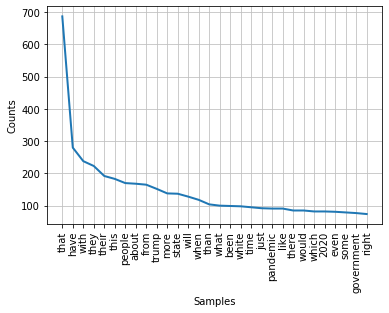

In [12]:
news_lemma_freq = nltk.FreqDist(lemma)
news_lemma_freq.plot(30, cumulative=False)

For my content coding, I'm choosing instrumental values and illocutionary values. The former outlines concepts that journalists tend to zero in on, while the latter seems to analyze word tone, which I'm very interested in seeing in this particular dataset.

In [13]:
AMBITIOUS = set([
                 'ambitious', 'ambition', 'striving', 'aspiring', 'go-getting', 'hard-driving', 
                 'self-seeking', 'determined', 'aspire', 'enterprising', 'industrious', 'competitive',
                 'ardent', 'assertive', 'opportunistic'
])

BROADMINDED = set([
                   'broad-minded', 'open-minded', 'liberal', 'nonjudgmental', 'tolerant', 
                   'nonconventional', 'nonorthodox', 'nontraditional', 'progressive', 
                   'radical', 'unconventional', 'unorthodox'
])

CAPABLE = set([
               'capable', 'competent', 'qualified', 'suitable', 'accomplished', 
               'adept', 'masterful', 'proficient', 'seasoned', 'skilled', 'skillful', 
               'prepared', 'well-prepared'
])

CHEERFUL = set([
                'cheerful', 'blithe', 'blithesome', 'bright', 'buoyant', 'cheery', 'chipper', 
                'eupeptic', 'gladsome', 'lightsome', 'sunny', 'upbeat', 'winsome'
])

CLEAN = set([
             'clean', 'chaste', 'immaculate', 'pristine', 'spotless', 'unsoiled', 'unstained', 
             'unsullied', 'decent', 'modest', 'healthy'
])

COURAGEOUS = set([
                  'courageous', 'bold', 'brave', 'dauntless', 'fearless', 
                  'gallant', 'greathearted', 'gutsy', 'heroic', 'intrepid', 
                  'lionhearted', 'manful', 'stalwart', 'stout', 'stouthearted', 
                  'undaunted', 'valiant', 'valorous'
])
            
FORGIVING = set([
                 'forgiving', 'caring', 'compassionate', 'considerate', 'cordial', 
                 'doting', 'friendly', 'humane', 'kind', 'understanding', 'warmhearted'
])

HELPFUL = set([
               'helpful', 'advantageous', 'beneficent', 'beneficial', 'benignant', 
               'favorable', 'kindly', 'salutary', 'kind', 'generous'
])

HONEST = set([
              'honest', 'truthful', 'veracious', 'candid', 'forthright', 'believable', 
              'credible', 'trustworthy', 'scrupulous'
])

IMAGINATIVE = set([
                   'imaginative', 'creative', 'arty', 'fanciful', 'clever', 'ingenious', 
                   'innovative', 'inventive', 'artful', 'artsy'
])

INDEPENDENT = set([
                   'independent', 'self-reliant', 'self-sufficient', 'self-supporting', 
                   'self-sustaining', 'autonomous', 'mature', 'sovereign'
])
            
INTELLECTUAL = set([
                    'intellectual', 'smart', 'cerebral', 'eggheaded', 'geeky', 'highbrow',
                    'erudite', 'learned', 'literate', 'polymath', 'scholarly', 'well-read',
                    'academic', 'bookish', 'professorial', 'didactic', 'pedantic', 
                    'educated', 'schooled'
])

LOGICAL = set([
               'logical', 'rational', 'analytical', 'coherent', 'reasonable', 'reasoned'
])

LOVING = set([
              'loving', 'affectionate', 'adoring', 'devoted', 'fond', 'tender', 
              'tenderhearted', 'caring', 'considerate', 'ardent', 'fervent', 
              'impassioned', 'passionate'
])

OBEDIENT = set([
                'obedient', 'amenable', 'biddable', 'compliant', 'conformable', 
                'docile', 'law-abiding', 'submissive', 'tractable', 'acquiescent',
                'yielding', 'tame', 'meek'
])

POLITE = set([
              'polite', 'civil', 'courteous', 'genteel', 'gracious', 'mannerly', 'well-bred',
              'solicitous'
])

RESPONSIBLE = set([
                   'responsible', 'dependable', 'reliable', 'accountable'
])
            
SELFCONTROL = set([
                   'self-control', 'restrained', 'sober', 'reserved', 'reticent', 
                   'levelheaded', 'pragmatic', 'sensible', 'steadfast', 'steady'
])

inst_values = ['ambitious', 'broadminded', 'capable', 'cheerful', 'clean', 'courageous', 
               'forgiving', 'helpful', 'honest', 'imaginative', 'independent', 
               'intellectual', 'logical', 'loving', 'obedient', 'polite', 'responsible', 'selfcontrol']

def instrumental_count(words):
    # This function computes if any of terms in the values sets are matched at least once
    # by tokens in the words set.

    ambitious_freq = broadminded_freq = capable_freq = cheerful_freq = clean_freq = courageous_freq = forgiving_freq = helpful_freq = honest_freq = imaginative_freq = independent_freq = intellectual_freq = logical_freq = loving_freq = obedient_freq = polite_freq = responsible_freq = selfcontrol_freq = 0

    for word in words:
        for term in AMBITIOUS:
            if word.find(term) != -1: #find() is a method of strings that returns the position of the match or -1 if no match was found
                ambitious_freq += 1
        for term in BROADMINDED:
            if word.find(term) != -1:
                broadminded_freq += 1
        for term in CAPABLE:
            if word.find(term) != -1:
                capable_freq += 1
        for term in CHEERFUL:
            if word.find(term) != -1:
                cheerful_freq += 1
        for term in CLEAN:
            if word.find(term) != -1:
                clean_freq += 1
        for term in COURAGEOUS:
            if word.find(term) != -1:
                courageous_freq += 1
        for term in FORGIVING:
            if word.find(term) != -1:
                forgiving_freq += 1
        for term in HELPFUL:
            if word.find(term) != -1:
                helpful_freq += 1
        for term in HONEST:
            if word.find(term) != -1:
                honest_freq += 1
        for term in IMAGINATIVE:
            if word.find(term) != -1:
                imaginative_freq += 1
        for term in INDEPENDENT:
            if word.find(term) != -1:
                independent_freq += 1
        for term in INTELLECTUAL:
            if word.find(term) != -1:
                intellectual_freq += 1
        for term in LOGICAL:
            if word.find(term) != -1:
                logical_freq += 1
        for term in LOVING:
            if word.find(term) != -1:
                loving_freq += 1
        for term in OBEDIENT:
            if word.find(term) != -1:
                obedient_freq += 1
        for term in POLITE:
            if word.find(term) != -1:
                polite_freq += 1
        for term in RESPONSIBLE:
            if word.find(term) != -1:
                responsible_freq += 1
        for term in SELFCONTROL:
            if word.find(term) != -1:
                selfcontrol_freq += 1

    valuefreqs = [ambitious_freq, broadminded_freq, capable_freq, cheerful_freq, clean_freq, 
                  courageous_freq, forgiving_freq, helpful_freq, honest_freq, imaginative_freq, 
                  independent_freq, intellectual_freq, logical_freq, loving_freq, 
                  obedient_freq, polite_freq, responsible_freq, selfcontrol_freq]

    return valuefreqs


In [14]:
ASSERTIVE_TERMS = set([
                    'am', 'are', 'is', 'was', 'were', 'affirm',
                    'allege', 'assert', 'forecast', 'predict', 'announce',
                    'insist', 'declare', 'state', 'propose',
                    'propound', 'maintain', 'contend', 'avow', 'warrant',
                    'believe', 'argue', 'aver', 'avouch', 'guarantee', 'profess',
                    'plead', 'reason', 'purport', 'claim', 'explain', 'proclaim' 
])
DIRECTIVE_TERMS = set([
                    'command', 'demand', 'forbid', 'recommend', 'order',
                    'decree', 'enact', 'direct', 'enjoin', 'instruct',
                    'compel', 'prohibit', 'dictate', 'require', 'mandate',
                    'require'
])
COMMISSIVE_TERMS = set([
                    'offer', 'promise', 'swear', 'volunteer', 'vow', 'pledge',
                    'attest', 'engage', 'troth'
])
EVALUATIVE_TERMS = set([
                     'thank', 'congratulate', 'pardon', 'excuse', 'blame', 
                     'praise', 'condolence', 'accuse', 'apologize',
                     'commiserate', 'approve', 'admire', 'commend', 'compliment',
                     'applaud',  'object', 'lament', 'condemn', 'admonish',
                     'reprove', 'rebuke', 'chastise', 'impeach', 'denounce',
                     'bless', 'glorify', 'acclaim', 'cheer', 'salute', 'censure',
                     'excoriate', 'chide', 'castigate', 'scold', 'reprehend',
])
ROGATIVE_TERMS = set([
                      'ask', 'inquire', 'question', 'query', 'beg', 'request',
                      'implore', 'beseech', 'petition', 'solicit', 'entreat',
                      'supplicate'
])

illact_labels = ['assertive', 'directive', 'commissive', 'evaluative', 'rogative']

def illact_count(words):
# This function computes the frequency of the matches of any term in the values set
# with tokens in the words set.

    assertive_freq = directive_freq = commissive_freq = evaluative_freq = rogative_freq = 0

    for word in words:
        for term in ASSERTIVE_TERMS:
            if word.find(term) != -1:
                assertive_freq += 1
        for term in DIRECTIVE_TERMS:
            if word.find(term) != -1:
                directive_freq += 1
        for term in COMMISSIVE_TERMS:
            if word.find(term) != -1:
                commissive_freq += 1
        for term in EVALUATIVE_TERMS:
            if word.find(term) != -1:
                evaluative_freq += 1
        for term in ROGATIVE_TERMS:
            if word.find(term) != -1:
                rogative_freq += 1

    illacts_freqs = [assertive_freq, directive_freq, commissive_freq, evaluative_freq, rogative_freq]

    return illacts_freqs



In [17]:
words = lemma

In [20]:
results = pd.Series(instrumental_count(words), index=inst_values)
results1 = pd.Series(illact_count(words), index=illact_labels)

print(results)
print(results1)

ambitious       12
broadminded     14
capable         12
cheerful         2
clean           12
courageous       3
forgiving       22
helpful         27
honest           7
imaginative     27
independent      2
intellectual    30
logical         18
loving           7
obedient         0
polite          34
responsible      7
selfcontrol      4
dtype: int64
assertive     2246
directive       82
commissive      48
evaluative      56
rogative       123
dtype: int64


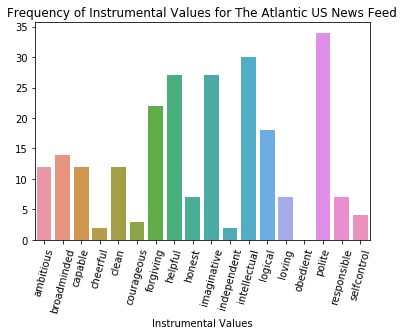

In [21]:
plt.plot()
plt.xlabel('Instrumental Values')
plt.title('Frequency of Instrumental Values for The Atlantic US News Feed')
plt.xticks(rotation=75)
sns.barplot(x=inst_values, y=results, linewidth=2.5)

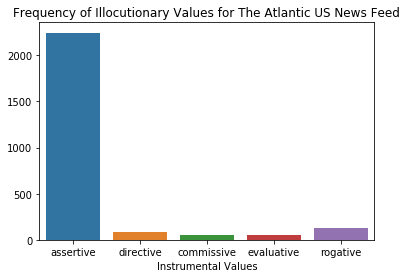

In [24]:
plt.plot()
plt.xlabel('Instrumental Values')
plt.title('Frequency of Illocutionary Values for The Atlantic US News Feed')
sns.barplot(x=illact_labels, y=results1, linewidth=2.5)

I'm honestly not surprised at these results. "Polite" and "assertive" are basically the core tenets of journalism, but it's interesting to see a high amount of words labeled "helpful," "forgiving," and "imaginative" in the instrumental values. In essence, journalism is professional--polite and assertive. But it is also a force for good, according to this content coding.

Other kinds of content that would be useful to examine would be Yelp reviews--if you wanted to know how your favorite restaurant was perceived in comparison to other restaurants, it might be useful to do a word net and maybe coding via illocutionary values (just to see who's more thoughtful in their review versus who's more confident in it).